<div class="alert alert-block alert-info">
__12/12__ Ananya Sriram

# Donovan Feist

# CH EN 3603

# Homework 7

# Problem 3

A liquid mixture containing 25 mol% benzene and 75 mol% ethyl alcohol, in which components are miscible in all proportions, is heated at a constant pressure of 1 atm from 60 $^oC$ to 90 $^oC$. Using the following T–x–y experimental data, determine

(a) the temperature where vaporization begins,

(b) the composition of the first bubble of vapor,

(c) the composition of the residual liquid when 25 mol% has evaporated, assuming that all vapor formed is retained in the apparatus and is in equilibrium with the residual liquid.

(d) Repeat part (c) for 90 mol% vaporized.

(e) Repeat part (d) if, after 25 mol% is vaporized as in part (c), the vapor formed is removed and an additional 35 mol% is vaporized by the same technique used in part (c).

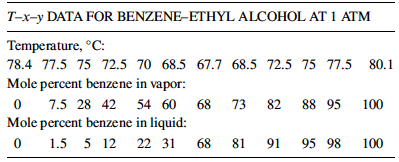

# Solution

## Part a

Vaporization will begin when the bubble-point curve intersects with a horizontal line drawn from the temperature axis, at the given composition.

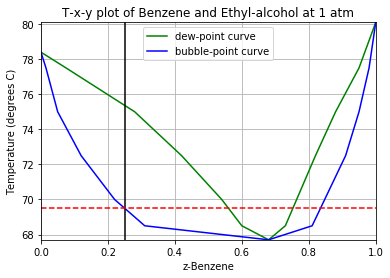

In [2]:
#imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import fsolve

#data
T=np.array([78.4,77.5,75.0,72.5,70.0,68.5,67.7,68.5,72.5,75,77.5,80.1])
yb=0.01*np.array([0,7.5,28,42,54,60,68,73,82,88,95,100])
xb=0.01*np.array([0,1.5,5,12,22,31,68,81,91,95,98,100])

#composition of benzene
zb=0.25

#horizontal temperature line
vec1=np.linspace(0,1)
temp=69.5 #degrees C
templine=temp*np.ones(len(vec1))

#plotting
plt.plot(yb,T,'g-',label='dew-point curve')
plt.plot(xb,T,'b-',label='bubble-point curve')
plt.plot([zb,zb],[min(T),max(T)],'k-')
plt.plot(vec1,templine,'r--')
plt.xlabel('z-Benzene')
plt.ylabel('Temperature (degrees C)')
plt.title('T-x-y plot of Benzene and Ethyl-alcohol at 1 atm')
plt.xlim(0,1)
plt.ylim(min(T),max(T))
plt.grid()
plt.legend(loc='best')
plt.show()

Vaporization begins at $\boxed{69.5 \space \space ^oC}$

## Part b

The composition of the first bubble of vapor is found by plotting a vertical line down from the intersection point of the dew-point curve and the horizontal temperature line (dashed red line).

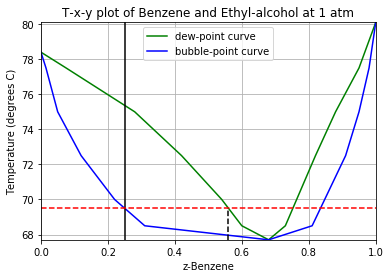

In [3]:
#vertical line for composition of first bubble
yfb=0.56
vec2=np.linspace(min(T),temp)

#plotting
plt.plot(yb,T,'g-',label='dew-point curve')
plt.plot(xb,T,'b-',label='bubble-point curve')
plt.plot([zb,zb],[min(T),max(T)],'k-')
plt.plot(vec1,templine,'r--')
plt.plot(yfb*np.ones(len(vec2)),vec2,'k--')
plt.xlabel('z-Benzene')
plt.ylabel('Temperature (degrees C)')
plt.title('T-x-y plot of Benzene and Ethyl-alcohol at 1 atm')
plt.xlim(0,1)
plt.ylim(min(T),max(T))
plt.grid()
plt.legend(loc='best')
plt.show()

The composition of the first bubble is

$\boxed{y_{Benzene}=0.56}$ and $\boxed{y_{Ethyl-alcohol}=0.44}$.

## Part c

When 25 mol% of the mixture has evaporated, $\frac{V}{F}=0.25$. The lever-arm rule can be used to determine the composition of the residual liquid.

T= 71.19047619047619 degrees C
x_Benzene= 0.1723809523809524
y_Benzene= 0.4828571428571429


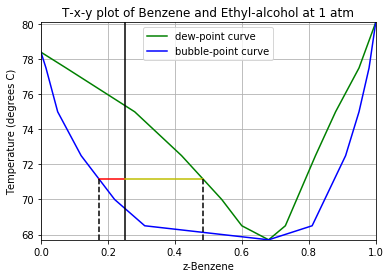

In [4]:
#V over F fraction
VoF=0.25 #fraction of the mixture that is a vapor

#creating interpolation function
Tguess=71 #degrees C
def func(Tguess):
    xguess=interp1d(T,xb)(Tguess)
    yguess=interp1d(T,yb)(Tguess)
    eqn=VoF-(zb-xguess)/(yguess-xguess) #eqn=V/F=fraction of mixture that is a vapor
    return eqn

#solving for the temperature
sol=fsolve(func,Tguess)[0]
print('T=',sol,'degrees C')

#creating lines to plot the lever arm lines
leftx=interp1d(T,xb)(sol)
print('x_Benzene=',leftx)
point1=[leftx,sol]
point2=[zb,sol]
x1=[point1[0], point2[0]]
y1=[point1[1], point2[1]]
righty=interp1d(T,yb)(sol)
print('y_Benzene=',righty)
point3=[zb,sol]
point4=[righty,sol]
x2=[point3[0], point4[0]]
y2=[point3[1], point4[1]]

#creating lines to plot the composition lines
point5=[leftx,min(T)]
point6=[leftx,sol]
x3=[point5[0],point6[0]]
y3=[point5[1],point6[1]]
point7=[righty,min(T)]
point8=[righty,sol]
x4=[point7[0],point8[0]]
y4=[point7[1],point8[1]]

#plotting
plt.plot(yb,T,'g-',label='dew-point curve')
plt.plot(xb,T,'b-',label='bubble-point curve')
plt.plot([zb,zb],[min(T),max(T)],'k-')
plt.plot(x1,y1,'r-')
plt.plot(x2,y2,'y-')
plt.plot(x3,y3,'k--')
plt.plot(x4,y4,'k--')
plt.xlabel('z-Benzene')
plt.ylabel('Temperature (degrees C)')
plt.title('T-x-y plot of Benzene and Ethyl-alcohol at 1 atm')
plt.xlim(0,1)
plt.ylim(min(T),max(T))
plt.grid()
plt.legend(loc='best')
plt.show()

The composition of the residual liquid is

$\boxed{x_{Benzene}=0.172}$ and $\boxed{x_{Ethyl-alcohol}=0.828}$.

## Part d

The same process used in part c is used here in part d, except that $\frac{V}{F}=0.90$.

T= 75.09308510638297 degrees C
x_Benzene= 0.048696808510638394
y_Benzene= 0.2723670212765963


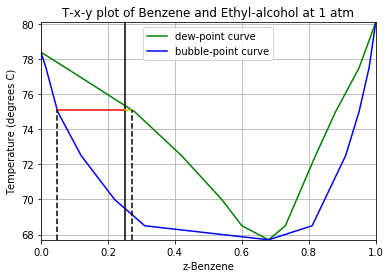

In [5]:
#shortened data arrays to avoid the azeotrope
Tshort=T[0:7]
ybshort=yb[0:7]
xbshort=xb[0:7]

#V over F fraction
VoF=0.90 #fraction of the mixture that is a vapor

#creating interpolation function
Tguess=71 #degrees C
def func(Tguess):
    xguess=interp1d(Tshort,xbshort)(Tguess)
    yguess=interp1d(Tshort,ybshort)(Tguess)
    eqn=VoF-(zb-xguess)/(yguess-xguess) #eqn=V/F=fraction of mixture that is a vapor
    return eqn

#solving for the temperature
sol=fsolve(func,Tguess)[0]
print('T=',sol,'degrees C')

#creating lines to plot the lever arm lines
leftx=interp1d(Tshort,xbshort)(sol)
print('x_Benzene=',leftx)
point1=[leftx,sol]
point2=[zb,sol]
x1=[point1[0], point2[0]]
y1=[point1[1], point2[1]]
righty=interp1d(Tshort,ybshort)(sol)
print('y_Benzene=',righty)
point3=[zb,sol]
point4=[righty,sol]
x2=[point3[0], point4[0]]
y2=[point3[1], point4[1]]

#creating lines to plot the composition lines
point5=[leftx,min(T)]
point6=[leftx,sol]
x3=[point5[0],point6[0]]
y3=[point5[1],point6[1]]
point7=[righty,min(T)]
point8=[righty,sol]
x4=[point7[0],point8[0]]
y4=[point7[1],point8[1]]

#plotting
plt.plot(yb,T,'g-',label='dew-point curve')
plt.plot(xb,T,'b-',label='bubble-point curve')
plt.plot([zb,zb],[min(T),max(T)],'k-')
plt.plot(x1,y1,'r-')
plt.plot(x2,y2,'y-')
plt.plot(x3,y3,'k--')
plt.plot(x4,y4,'k--')
plt.xlabel('z-Benzene')
plt.ylabel('Temperature (degrees C)')
plt.title('T-x-y plot of Benzene and Ethyl-alcohol at 1 atm')
plt.xlim(0,1)
plt.ylim(min(T),max(T))
plt.grid()
plt.legend(loc='best')
plt.show()

The composition of the residual liquid is

$\boxed{x_{Benzene}=0.0487}$ and $\boxed{x_{Ethyl-alcohol}=0.951}$.

## Part e

After 25 mol% is vaporized and removed, the composition of the remaining liquid is $x_{Benzene}=0.172$.

T= 73.90211640211636 degrees C
x_Benzene= 0.08074074074074183
y_Benzene= 0.3414814814814837


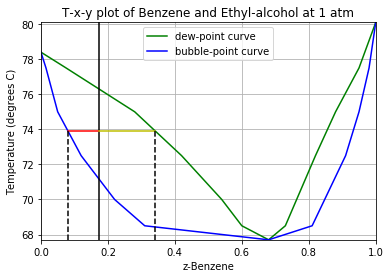

In [6]:
#shortened data arrays to avoid the azeotrope
Tshort=T[0:7]
ybshort=yb[0:7]
xbshort=xb[0:7]

#V over F fraction
VoF=0.35 #fraction of the mixture that is a vapor

#mole fraction of Benzene in the mixture
zb=0.172

#creating interpolation function
Tguess=71 #degrees C
def func(Tguess):
    xguess=interp1d(Tshort,xbshort)(Tguess)
    yguess=interp1d(Tshort,ybshort)(Tguess)
    eqn=VoF-(zb-xguess)/(yguess-xguess) #eqn=V/F=fraction of mixture that is a vapor
    return eqn

#solving for the temperature
sol=fsolve(func,Tguess)[0]
print('T=',sol,'degrees C')

#creating lines to plot the lever arm lines
leftx=interp1d(Tshort,xbshort)(sol)
print('x_Benzene=',leftx)
point1=[leftx,sol]
point2=[zb,sol]
x1=[point1[0], point2[0]]
y1=[point1[1], point2[1]]
righty=interp1d(Tshort,ybshort)(sol)
print('y_Benzene=',righty)
point3=[zb,sol]
point4=[righty,sol]
x2=[point3[0], point4[0]]
y2=[point3[1], point4[1]]

#creating lines to plot the composition lines
point5=[leftx,min(T)]
point6=[leftx,sol]
x3=[point5[0],point6[0]]
y3=[point5[1],point6[1]]
point7=[righty,min(T)]
point8=[righty,sol]
x4=[point7[0],point8[0]]
y4=[point7[1],point8[1]]

#plotting
plt.plot(yb,T,'g-',label='dew-point curve')
plt.plot(xb,T,'b-',label='bubble-point curve')
plt.plot([zb,zb],[min(T),max(T)],'k-')
plt.plot(x1,y1,'r-')
plt.plot(x2,y2,'y-')
plt.plot(x3,y3,'k--')
plt.plot(x4,y4,'k--')
plt.xlabel('z-Benzene')
plt.ylabel('Temperature (degrees C)')
plt.title('T-x-y plot of Benzene and Ethyl-alcohol at 1 atm')
plt.xlim(0,1)
plt.ylim(min(T),max(T))
plt.grid()
plt.legend(loc='best')
plt.show()

The composition of the residual liquid is

$\boxed{x_{Benzene}=0.0807}$ and $\boxed{x_{Ethyl-alcohol}=0.919}$.